<font size="5.5"><u><i>Num. Waveform Explorer</i></u></font>

<font size="4">Script to explore multi-dimensional numerical CCSNe waveforms.</font>
<br/>
<font size="4">Author: Manuel David Morales</font>

## 1. Library imports

In [1]:
# Data analysis
import numpy as np 
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import colors

# Files/folders management
import h5py
import os, glob, sys, re, io

# Scientific computing
from scipy import signal
from scipy import stats
import statistics

# Garbage collector
import gc

# Image management
from PIL import Image

# Toolbox functions
from Toolbox import extract_WFinfo, rescale_gw, resample_gw, SNR, SNR_PyCBC, WaveletTF_transform, Morlet_wavelet

## 2. Read files

In [2]:
# --------- Numerical waveforms
# -------------------------------

# Kuroda et al (2017): https://doi.org/10.3847/1538-4357/aa988d
# Andresen et al (2019): https://doi.org/10.1093/mnras/stz990 

# ------> Read Kuroda waveform
# ------------------------------

# Read h5 file
wf_num_dir = '/home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Num/'
file_path = wf_num_dir + "Kuroda s15d0 (2017)/" + "S15.0_GW_Nu.h5"
with h5py.File(file_path, 'r') as f:
    data = f['waveform']
    Kur_s15d0 = pd.DataFrame(np.array(data))
    
# Remove column of neutrino signal
Kur_s15d0 = Kur_s15d0.drop(Kur_s15d0.columns[[3]], axis=1)

# Name columns
Kur_s15d0.columns =['Time(s)', 'h+', 'hx']

# Check: Print dataframe
print("Kuroda 2017, s15.0 model")
print(Kur_s15d0.head())
print("")

# ------> Read Andresen waveforms
# ---------------------------------

# Read dat file
file_path = wf_num_dir + "Andresen s15nr (2019)/" + "gw_s15nr.dat"
wf_Andr = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Split dataframe by models
Andr_m15fr = wf_Andr.iloc[:, [0, 1, 2]]
Andr_m15r  = wf_Andr.iloc[:, [0, 3, 4]]
Andr_m15nr = wf_Andr.iloc[:, [0, 5, 6]]

# Name columns
Andr_m15fr.columns = ['Time(s)', 'h+', 'hx']
Andr_m15r.columns  = ['Time(s)', 'h+', 'hx']
Andr_m15nr.columns = ['Time(s)', 'h+', 'hx']

# Check: Print dataframes
print("Andresen 2019, m15fr model")
print(Andr_m15fr.head())
print("")
print("Andresen 2019, m15r model")
print(Andr_m15r.head())
print("")
print("Andresen 2019, m15nr model")
print(Andr_m15nr.head())

# ------> Read Yakunin waveforms
# --------------------------------

# Read dat file
file_path = wf_num_dir + "Yakunin B (2015)/" + "rhplus-B12-WH07.d"
wf_Yak = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Remove column of neutrino signal and luminositu
Yak_B12 = wf_Yak.drop(wf_Yak.columns[[2,3]], axis=1)

# Remove title of columns
Yak_B12 = Yak_B12.drop([0])

# Name columns
Yak_B12.columns =['Time(s)', 'h+']

# Check: Print dataframe
print("Yakunin 2015, B12 model")
print(Yak_B12.head())
print("")

# Read dat file
file_path = wf_num_dir + "Yakunin B (2015)/" + "rhplus-B20-WH07.d"
wf_Yak = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Remove column of neutrino signal and luminosity
Yak_B20 = wf_Yak.drop(wf_Yak.columns[[2]], axis=1)

# Remove title of columns
Yak_B20 = Yak_B20.drop([0])

# Name columns
Yak_B20.columns =['Time(s)', 'h+']

# Check: Print dataframe
print("Yakunin 2015, B20 model")
print(Yak_B20.head())
print("")

# ------> Read Mezzacappa waveforms
# ----------------------------------

# Read dat file
file_path = wf_num_dir + "Mezzacappa C15-3D (2020)/" + "GW_C15-3D_Filter_Equatorial.dat"
wf_Mezz = pd.read_csv(file_path, delim_whitespace=True, skiprows=6, header=None)

# Remove columns different than strain and time
Mezz_C153D = wf_Mezz.drop(wf_Mezz.columns[[3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)

# Remove title of columns
Mezz_C153D = Mezz_C153D.drop([0])

# Remove three last rows of information
Mezz_C153D = Mezz_C153D.iloc[:-3] 

# Name columns
Mezz_C153D.columns =['Time(ms)', 'h+', 'hx']

# Check: Print dataframe
print("Mezzacappa 2020, C15-3D model")
print(Mezz_C153D.head())
print("")

Kuroda 2017, s15.0 model
   Time(s)        h+         hx
0  -0.0014  0.579026 -62.131985
1  -0.0004  0.579027 -62.172852
2   0.0006  0.579027 -62.205517
3   0.0016  0.579028 -62.237110
4   0.0026  0.583426  46.182819

Andresen 2019, m15fr model
    Time(s)        h+        hx
0  0.009950 -0.154295  0.191732
1  0.010453 -0.178888  0.170970
2  0.010953  0.080068  0.438847
3  0.011456 -0.401638 -0.093425
4  0.011957 -0.313251  0.213792

Andresen 2019, m15r model
    Time(s)        h+        hx
0  0.009950 -0.037437 -0.000699
1  0.010453  0.007918 -0.001300
2  0.010953 -0.518915 -0.001317
3  0.011456  0.495063 -0.002397
4  0.011957  0.099459 -0.002351

Andresen 2019, m15nr model
    Time(s)        h+        hx
0  0.009950 -0.003748 -0.005246
1  0.010453 -0.035036 -0.000116
2  0.010953 -0.000229  0.000551
3  0.011456  0.010890  0.002601
4  0.011957  0.000086  0.003591
Yakunin 2015, B12 model
         Time(s)              h+
1  2.6337657E-01  -3.7272602E-02
2  2.6357655E-01  -2.5180447E-02
3

## 3. Resample waveforms

In [3]:
# ------> Create numpy arrays

# Kuroda waveform

Kur = Kur_s15d0.to_numpy()
Kur = np.transpose(Kur)

# Andresen waveforms

Andr1 = Andr_m15fr.to_numpy()
Andr1 = np.transpose(Andr1)

Andr2 = Andr_m15r.to_numpy()
Andr2 = np.transpose(Andr2)

Andr3 = Andr_m15nr.to_numpy()
Andr3 = np.transpose(Andr3)

# Yakunin waveforms

Yak1 = Yak_B12.to_numpy()
Yak1 = np.transpose(Yak1)
Yak1 = np.array(Yak1, dtype=float)

Yak2 = Yak_B20.to_numpy()
Yak2 = np.transpose(Yak1)
Yak2 = np.array(Yak1, dtype=float)

# Mezzacappa waveforms

Mezz = Mezz_C153D.to_numpy()
Mezz = np.transpose(Mezz)
Mezz = np.array(Mezz, dtype=float)

# Convert time in Mezzacappa model from ms to s
Mezz[0] = Mezz[0]*0.001

In [4]:
# ------> Resampling of the time domain to fs = 4096 Hz

fs_after = 4096

# Kuroda model

t_kur, s_kur_hp = resample_gw(Kur[0], Kur[1], fs_after)
t_kur, s_kur_hc = resample_gw(Kur[0], Kur[2], fs_after)

# Andresen models

t_andr, s_andr1_hp = resample_gw(Andr1[0], Andr1[1], fs_after)
t_andr, s_andr1_hc = resample_gw(Andr1[0], Andr1[2], fs_after)

t_andr, s_andr2_hp = resample_gw(Andr2[0], Andr2[1], fs_after)
t_andr, s_andr2_hc = resample_gw(Andr2[0], Andr2[2], fs_after)

t_andr, s_andr3_hp = resample_gw(Andr3[0], Andr3[1], fs_after)
t_andr, s_andr3_hc = resample_gw(Andr3[0], Andr3[2], fs_after)

# Yakunin models

t_yak1, s_yak1_hp = resample_gw(Yak1[0], Yak1[1], fs_after)
t_yak2, s_yak2_hp = resample_gw(Yak2[0], Yak2[1], fs_after)

# Mezzcapa models
t_mezz, s_mezz_hp = resample_gw(Mezz[0], Mezz[1], fs_after)
t_mezz, s_mezz_hc = resample_gw(Mezz[0], Mezz[2], fs_after)

## 4. Rescale waveforms

In [5]:
# ------> Convert strains to adimensional at 10 Kpc 

cm2kpc = 3.24078e-22
D10kpc = cm2kpc / 10

s_kur_hp = s_kur_hp * D10kpc ; s_kur_hc = s_kur_hc * D10kpc

s_andr1_hp = s_andr1_hp * D10kpc ; s_andr1_hc = s_andr1_hc * D10kpc
s_andr2_hp = s_andr2_hp * D10kpc ; s_andr2_hc = s_andr2_hc * D10kpc
s_andr3_hp = s_andr3_hp * D10kpc ; s_andr3_hc = s_andr3_hc * D10kpc

s_yak1_hp = s_yak1_hp * D10kpc ; s_yak2_hp = s_yak2_hp * D10kpc

s_mezz_hp = s_mezz_hp * D10kpc ; s_mezz_hc = s_mezz_hc * D10kpc

# ------> Set some distances to check strain plots

s_kur_hp_5kpc = rescale_gw(s_kur_hp, 5)

s_andr1_hc_30kpc = rescale_gw(s_andr1_hc, 30)
s_andr2_hp_20kpc = rescale_gw(s_andr2_hp, 20)
s_andr3_hc_1kpc  = rescale_gw(s_andr3_hc, 1)

s_yak1_hp_5kpc = rescale_gw(s_yak1_hp, 5)
s_yak2_hp_20kpc = rescale_gw(s_yak2_hp, 20)

s_mezz_hp_5kpc = rescale_gw(s_mezz_hp, 5)
s_mezz_hc_20kpc = rescale_gw(s_mezz_hc, 20)

## 5. Strain waveforms

### 5.1. Kuroda model

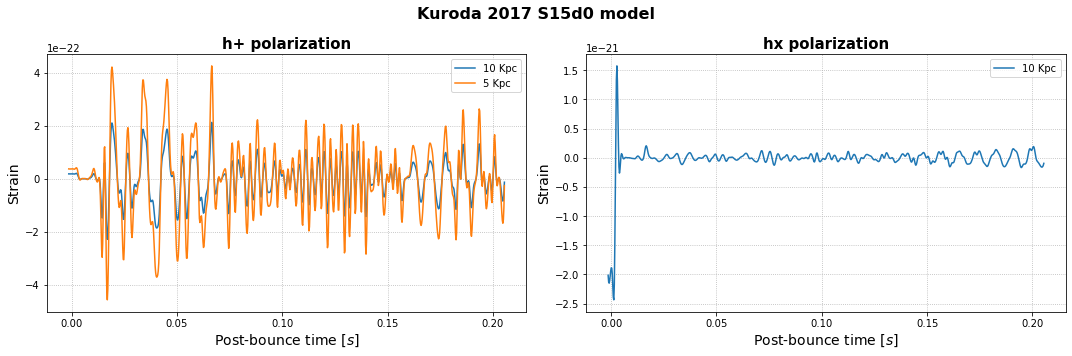

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Kuroda 2017 S15d0 model', fontsize=16, fontweight="bold")

ax1.plot(t_kur, s_kur_hp, label = "10 Kpc")
ax1.plot(t_kur, s_kur_hp_5kpc, label = "5 Kpc")
ax1.set_title("h+ polarization", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.grid(which='both', linestyle=':')
ax1.legend()

ax2.plot(t_kur, s_kur_hc, label = "10 Kpc")
ax2.set_title("hx polarization", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.grid(which='both', linestyle=':')
ax2.legend()

fig.tight_layout()

### 5.2. Andresen models

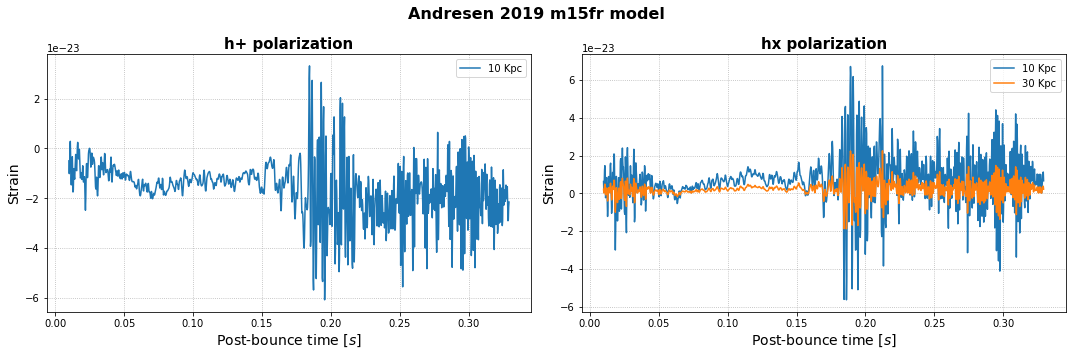

In [7]:
# ------> Andresen m15fr model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Andresen 2019 m15fr model', fontsize=16, fontweight="bold")

ax1.plot(t_andr, s_andr1_hp, label = "10 Kpc")
ax1.set_title("h+ polarization", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.grid(which='both', linestyle=':')
ax1.legend()

ax2.plot(t_andr, s_andr1_hc, label = "10 Kpc")
ax2.plot(t_andr, s_andr1_hc_30kpc, label = "30 Kpc")
ax2.set_title("hx polarization", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.grid(which='both', linestyle=':')
ax2.legend()

fig.tight_layout()

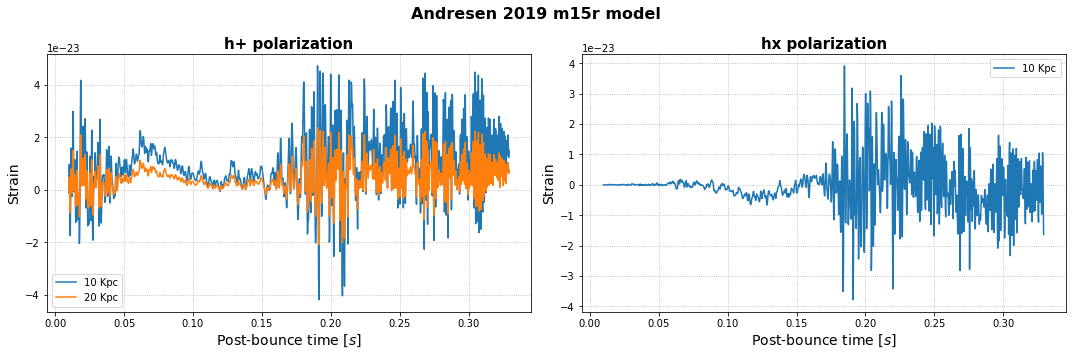

In [8]:
# ------> Andresen m15r model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Andresen 2019 m15r model', fontsize=16, fontweight="bold")

ax1.plot(t_andr, s_andr2_hp, label = "10 Kpc")
ax1.plot(t_andr, s_andr2_hp_20kpc, label = "20 Kpc")
ax1.set_title("h+ polarization", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.grid(which='both', linestyle=':')
ax1.legend()

ax2.plot(t_andr, s_andr2_hc, label = "10 Kpc")
ax2.set_title("hx polarization", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.grid(which='both', linestyle=':')
ax2.legend()

fig.tight_layout()

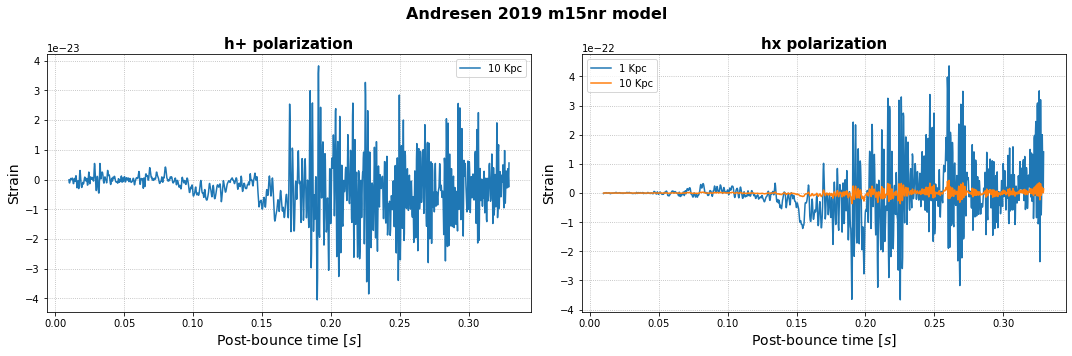

In [9]:
# ------> Andresen m15nr model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Andresen 2019 m15nr model', fontsize=16, fontweight="bold")

ax1.plot(t_andr, s_andr3_hp, label = "10 Kpc")
ax1.set_title("h+ polarization", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.grid(which='both', linestyle=':')
ax1.legend()

ax2.plot(t_andr, s_andr3_hc_1kpc, label = "1 Kpc")
ax2.plot(t_andr, s_andr3_hc, label = "10 Kpc")
ax2.set_title("hx polarization", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.grid(which='both', linestyle=':')
ax2.legend()

fig.tight_layout()

### 5.3. Yakunin models

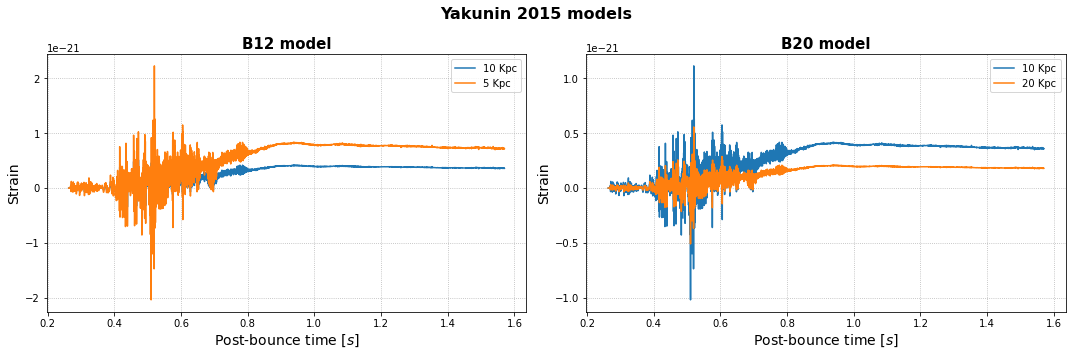

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Yakunin 2015 models', fontsize=16, fontweight="bold")

ax1.plot(t_yak1, s_yak1_hp, label = "10 Kpc")
ax1.plot(t_yak1, s_yak1_hp_5kpc, label = "5 Kpc")
ax1.set_title("B12 model", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.grid(which='both', linestyle=':')
ax1.legend()

ax2.plot(t_yak2, s_yak2_hp, label = "10 Kpc")
ax2.plot(t_yak2, s_yak2_hp_20kpc, label = "20 Kpc")
ax2.set_title("B20 model", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.grid(which='both', linestyle=':')
ax2.legend()

fig.tight_layout()

### 5.4. Mezzacappa model

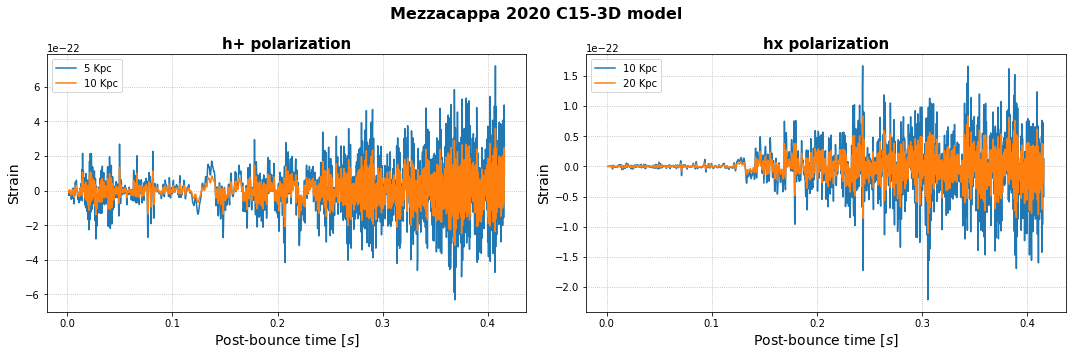

In [11]:
# ------> Mezzacappa C15-3D model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Mezzacappa 2020 C15-3D model', fontsize=16, fontweight="bold")

ax1.plot(t_mezz, s_mezz_hp_5kpc, label = "5 Kpc")
ax1.plot(t_mezz, s_mezz_hp, label = "10 Kpc")
ax1.set_title("h+ polarization", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.grid(which='both', linestyle=':')
ax1.legend()

ax2.plot(t_mezz, s_mezz_hc, label = "10 Kpc")
ax2.plot(t_mezz, s_mezz_hc_20kpc, label = "20 Kpc")
ax2.set_title("hx polarization", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.grid(which='both', linestyle=':')
ax2.legend()

fig.tight_layout()

## 6. Scalograms, HFF slopes

### 5.1. Kuroda model S15.d0

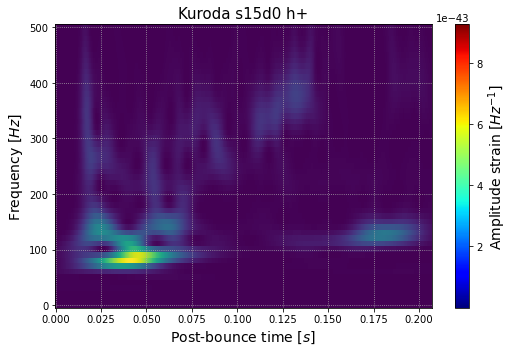

<Figure size 432x288 with 0 Axes>

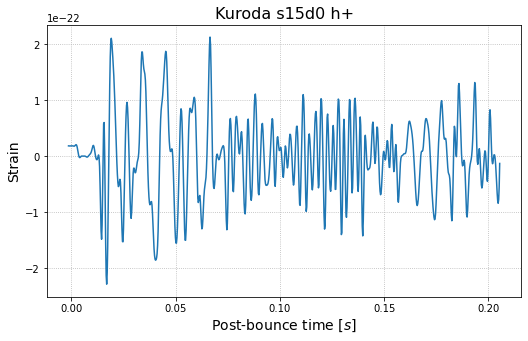

3060

<Figure size 432x288 with 0 Axes>

In [12]:
# ------> Compute wavelet transform

time, freq, WL = WaveletTF_transform(s_kur_hp, fs_after, 1, 500, 10, 7, 0)

# ------> Plot original scalogram (printable plots)

plt.figure(1, figsize=(7.5,5))

plt.pcolormesh(time, freq, WL, shading='auto')
#norm = colors.Normalize(s_kur_hp.min(), s_kur_hp.max())
norm = colors.Normalize(WL.min(), WL.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
plt.colorbar(mappable).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Frequency [$Hz$]', fontsize=14)
plt.title('Kuroda s15d0 h+', fontsize=15)

plt.grid(which='both', linestyle=':')
plt.tight_layout()

plt.savefig("../Figures/" + "Kuroda_scalogram.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

# Printable plot strain

plt.figure(2, figsize=(8.5,5))

plt.plot(t_kur, s_kur_hp)
plt.title("Kuroda s15d0 h+", fontsize=16)
plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Strain', fontsize=14)
plt.grid(which='both', linestyle=':')

plt.savefig("../Figures/" + "Kuroda_strain.pdf", format="pdf")

plt.show()
plt.figure(2).clear()
gc.collect()

Wavelet Matrix dim: (51, 848)
Time array dim: (848,)
Frequency array dim: (51,)

Delta t =  0.000244140625
Delta f =  9.98

Aritmetic mean of WL pixels: 3.8985696684529746e-44

Sorted t array length: 1842
Sorted f array length: 1842
Sorted W array length: 1842



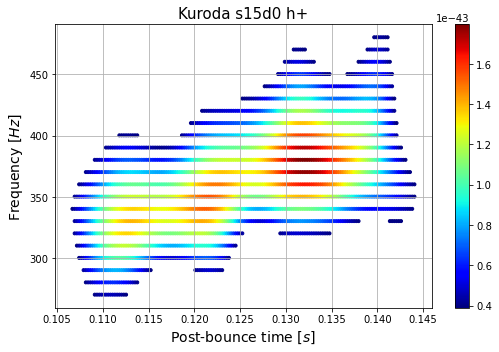

In [13]:
# ------> Plot pixelized (scattered) scalogram

# Check dimensions
print("Wavelet Matrix dim:", WL.shape)
print("Time array dim:", time.shape)
print("Frequency array dim:", np.transpose(freq)[0].shape)

print("")

# Sampling time / frequency
delta_t = time[1] - time[0]
delta_f = freq[1][0] - freq[0][0]
print("Delta t = ", delta_t)
print("Delta f = ", delta_f)

print("")

# Mean of WL pixels
WL_mean = np.mean(WL)
print("Aritmetic mean of WL pixels:", WL_mean)

# Reorganize arrays for time, freq, and wavelet

sorted_t = []
sorted_f = []
sorted_W = []

# Remark: WL[freq_index][time_index] (elements)
#         freq_index for row, time_index is for column

for freq_index in range(WL.shape[0]):    
    for time_index in range(WL.shape[1]):
        
        # Selection 1: Most energetic pixels,
        #              WL > mean(WL)
        if WL[freq_index][time_index] > WL_mean:
            
            # Selection 2: Pixels non in convection feature
            #              t > 0.1 seconds
            if time_index*delta_t > 0.1:
            
            # Selection 3: Pixels non in SASI feature,
            #              f > 200 Hz
                if (freq_index+1)*delta_f > 200:
                
                    sorted_t.append(time[time_index])
                    sorted_f.append(freq[freq_index])
                    sorted_W.append(WL[freq_index][time_index])

print("")
            
# Check dimensions
print("Sorted t array length:", len(sorted_t))
print("Sorted f array length:", len(sorted_f))
print("Sorted W array length:", len(sorted_W))

print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
    
plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Kuroda s15d0 h+', fontsize=15)

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()
plt.show()

Linear regression for most energetic pixels
---------------------------------------------
R-squared: 0.7500754465246702
Intercept: 136.22221615449703
Slope: 1760.3460459186604
---------------------------------------------



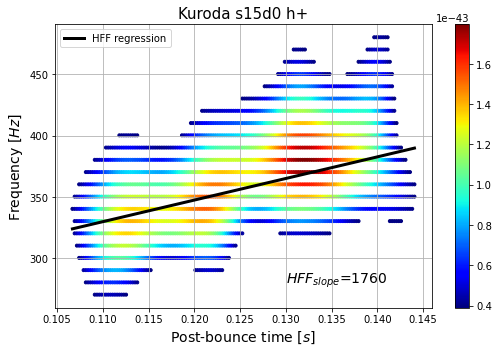

<Figure size 432x288 with 0 Axes>

In [15]:
# ------> Linear regression to estimate HFF slope

# Unique values of time
unique_t = np.unique(sorted_t)

# Initialize array for location of
# most energetic pixels per time
locate_maxpix = []

# Select most energetic pixels per time
for i in range(len(unique_t)):
    
    # Find location indexes for unique_t(i) in sorted_t array
    time_loc_ind = np.where(sorted_t == unique_t[i])[0]

    # Select most energetic pixel at time unique_t(i)
    W_max = 0
    for j in range(len(time_loc_ind)):
        
        if sorted_W[time_loc_ind[j]] > W_max:
            W_max = sorted_W[time_loc_ind[j]]
            ind_max_onetime = time_loc_ind[j]
    
    locate_maxpix.append(ind_max_onetime)

# Location (time,freq) of most energetic pixels
t_lr = np.take(sorted_t, locate_maxpix)
f_lr = np.take(sorted_f, locate_maxpix)

# Apply linear regression
res = stats.linregress(t_lr, f_lr)

# Print results
print("Linear regression for most energetic pixels")
print("---------------------------------------------")
print("R-squared:", res.rvalue**2)
print("Intercept:", res.intercept)
print("Slope:", res.slope)
print("---------------------------------------------")
print("")

# Plot scattered scalogram for most energetic pixels (printable plot)

fig = plt.figure(1, figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
plt.plot(t_lr, res.intercept + res.slope*t_lr, 'k-', linewidth=3, label='HFF regression')
plt.text(0.130, 280,'$HFF_{slope}$='+str(round(res.slope)), fontsize=14)
    
plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Kuroda s15d0 h+', fontsize=15)
plt.legend()

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()

plt.savefig("../Figures/" + "Kuroda_HFFslope.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

plt.show()

### 5.2. Andresen model m15r

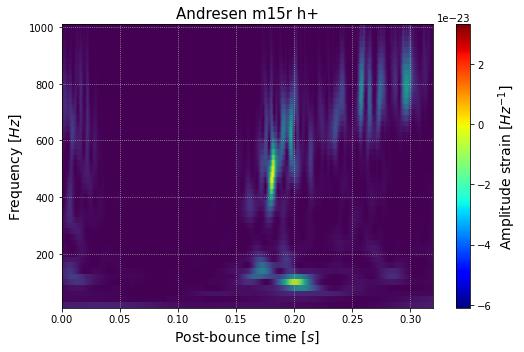

<Figure size 432x288 with 0 Axes>

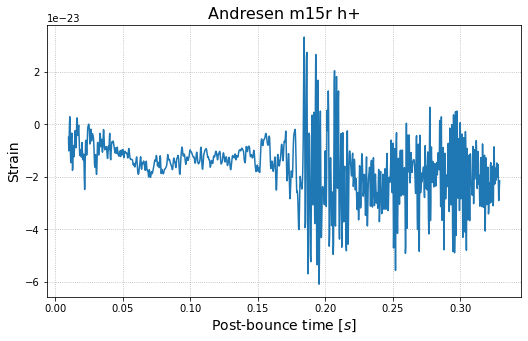

3233

<Figure size 432x288 with 0 Axes>

In [16]:
# ------> Compute wavelet transform

time, freq, WL = WaveletTF_transform(s_andr2_hp, fs_after, 20, 1000, 20, 7, 0)

# ------> Plot original scalogram

plt.figure(1, figsize=(7.5,5))

plt.pcolormesh(time, freq, WL, shading='auto')
norm = colors.Normalize(s_andr1_hp.min(), s_andr1_hp.max())
#norm = colors.Normalize(WL.min(), WL.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
plt.colorbar(mappable).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Frequency [$Hz$]', fontsize=14)
plt.title('Andresen m15r h+', fontsize=15)

plt.grid(which='both', linestyle=':')
plt.tight_layout()

plt.savefig("../Figures/" + "Andresen_scalogram.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

# Printable plot strain

plt.figure(2, figsize=(8.5,5))

plt.plot(t_andr, s_andr1_hp)
plt.title("Andresen m15r h+", fontsize=16)
plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Strain', fontsize=14)
plt.grid(which='both', linestyle=':')

plt.savefig("../Figures/" + "Andresen_strain.pdf", format="pdf")

plt.show()
plt.figure(2).clear()
gc.collect()

Wavelet Matrix dim: (50, 1309)
Time array dim: (1309,)
Frequency array dim: (50,)

Delta t =  0.000244140625
Delta f =  20.0

Aritmetic mean of WL pixels: 4.8712038811472314e-46

Sorted t array length: 8951
Sorted f array length: 8951
Sorted W array length: 8951



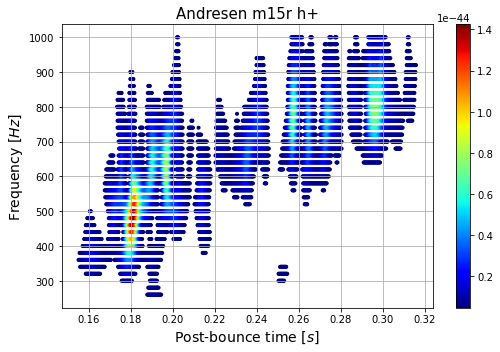

In [17]:
# ------> Plot pixelized (scattered) scalogram

# Check dimensions
print("Wavelet Matrix dim:", WL.shape)
print("Time array dim:", time.shape)
print("Frequency array dim:", np.transpose(freq)[0].shape)

print("")

# Sampling time / frequency
delta_t = time[1] - time[0]
delta_f = freq[1][0] - freq[0][0]
print("Delta t = ", delta_t)
print("Delta f = ", delta_f)

print("")

# Mean of WL pixels
WL_mean = np.mean(WL)
print("Aritmetic mean of WL pixels:", WL_mean)

# Reorganize arrays for time, freq, and wavelet

sorted_t = []
sorted_f = []
sorted_W = []

# Remark: WL[freq_index][time_index] (elements)
#         freq_index for row, time_index is for column

for freq_index in range(WL.shape[0]):    
    for time_index in range(WL.shape[1]):
        
        # Selection 1: Most energetic pixels,
        #              WL > mean(WL)
        if WL[freq_index][time_index] > WL_mean:
            
            # Selection 2: Pixels non in convection feature
            #              t > 0.1 seconds
            if time_index*delta_t > 0.1:
            
            # Selection 3: Pixels non in SASI feature,
            #              f > 250 Hz
                if (freq_index+1)*delta_f > 250:
                
                    sorted_t.append(time[time_index])
                    sorted_f.append(freq[freq_index])
                    sorted_W.append(WL[freq_index][time_index])

print("")
            
# Check dimensions
print("Sorted t array length:", len(sorted_t))
print("Sorted f array length:", len(sorted_f))
print("Sorted W array length:", len(sorted_W))

print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
    
plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Andresen m15r h+', fontsize=15)

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()
plt.show()

Linear regression for most energetic pixels
---------------------------------------------
R-squared: 0.7401021528158628
Intercept: 24.37316241659721
Slope: 2646.783777460204
---------------------------------------------



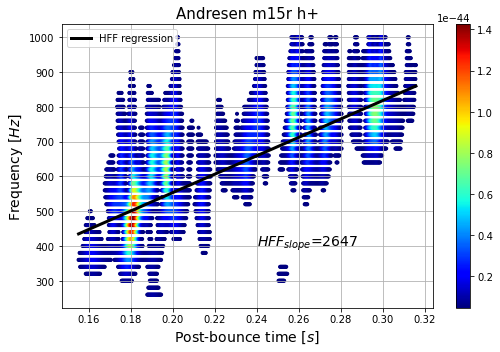

<Figure size 432x288 with 0 Axes>

In [19]:
# ------> Linear regression to estimate HFF slope

# Unique values of time
unique_t = np.unique(sorted_t)

# Initialize array for location of
# most energetic pixels per time
locate_maxpix = []

# Select most energetic pixels per time
for i in range(len(unique_t)):
    
    # Find location indexes for unique_t(i) in sorted_t array
    time_loc_ind = np.where(sorted_t == unique_t[i])[0]

    # Select most energetic pixel at time unique_t(i)
    W_max = 0
    for j in range(len(time_loc_ind)):
        
        if sorted_W[time_loc_ind[j]] > W_max:
            W_max = sorted_W[time_loc_ind[j]]
            ind_max_onetime = time_loc_ind[j]
    
    locate_maxpix.append(ind_max_onetime)

# Location (time,freq) of most energetic pixels
t_lr = np.take(sorted_t, locate_maxpix)
f_lr = np.take(sorted_f, locate_maxpix)

# Apply linear regression
res = stats.linregress(t_lr, f_lr)

# Print results
print("Linear regression for most energetic pixels")
print("---------------------------------------------")
print("R-squared:", res.rvalue**2)
print("Intercept:", res.intercept)
print("Slope:", res.slope)
print("---------------------------------------------")
print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
plt.plot(t_lr, res.intercept + res.slope*t_lr, 'k-', linewidth=3, label='HFF regression')
plt.text(0.24, 400,'$HFF_{slope}$='+str(round(res.slope)), fontsize=14)

plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Andresen m15r h+', fontsize=15)
plt.legend()

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()

plt.savefig("../Figures/" + "Andresen_HFFslope.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

plt.show()

### 5.3. Yakunin model B12

In [20]:
# Consider only the import part of the signal
t_reduced = 0.6 # in seconds
index = int(t_reduced/(t_yak1[1]-t_yak1[0]))

t_yak1 = t_yak1[0:index]
s_yak1_hp = s_yak1_hp[0:index]

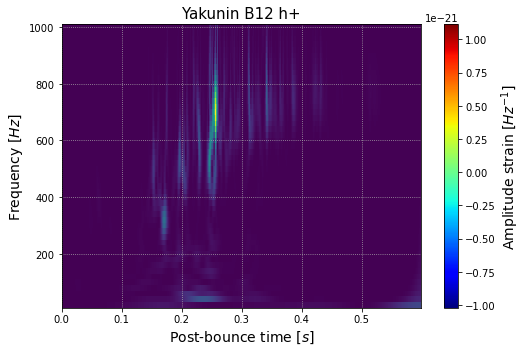

<Figure size 432x288 with 0 Axes>

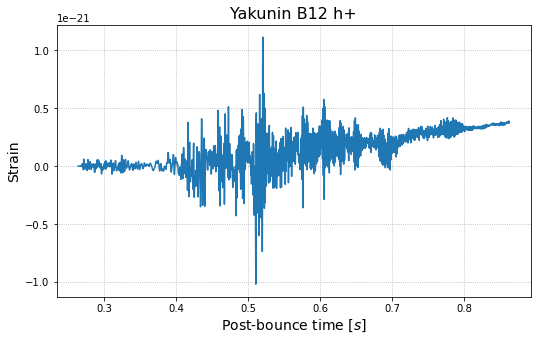

<Figure size 432x288 with 0 Axes>

In [21]:
# ------> Compute wavelet transform

time, freq, WL = WaveletTF_transform(s_yak1_hp, fs_after, 20, 1000, 20, 7, 0)

# ------> Plot original scalogram

plt.figure(1, figsize=(7.5,5))

plt.pcolormesh(time, freq, WL, shading='auto')
norm = colors.Normalize(s_yak1_hp.min(), s_yak1_hp.max())
#norm = colors.Normalize(WL.min(), WL.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
plt.colorbar(mappable).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Frequency [$Hz$]', fontsize=14)
plt.title('Yakunin B12 h+', fontsize=15)

plt.grid(which='both', linestyle=':')
plt.tight_layout()

plt.savefig("../Figures/" + "Yakunin_scalogram.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

# Printable plot strain

plt.figure(2, figsize=(8.5,5))

plt.plot(t_yak1, s_yak1_hp)
plt.title("Yakunin B12 h+", fontsize=16)
plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Strain', fontsize=14)
plt.grid(which='both', linestyle=':')

plt.savefig("../Figures/" + "Yakunin_strain.pdf", format="pdf")

plt.show()
plt.figure(2).clear()

Wavelet Matrix dim: (50, 2457)
Time array dim: (2457,)
Frequency array dim: (50,)

Delta t =  0.000244140625
Delta f =  20.0

Aritmetic mean of WL pixels: 5.016254427269698e-44

Sorted t array length: 16830
Sorted f array length: 16830
Sorted W array length: 16830



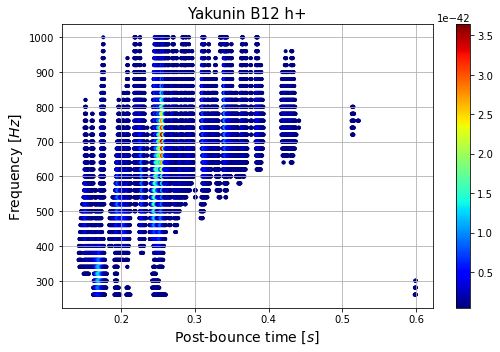

In [22]:
# ------> Plot pixelized (scattered) scalogram

# Check dimensions
print("Wavelet Matrix dim:", WL.shape)
print("Time array dim:", time.shape)
print("Frequency array dim:", np.transpose(freq)[0].shape)

print("")

# Sampling time / frequency
delta_t = time[1] - time[0]
delta_f = freq[1][0] - freq[0][0]
print("Delta t = ", delta_t)
print("Delta f = ", delta_f)

print("")

# Mean of WL pixels
WL_mean = np.mean(WL)
print("Aritmetic mean of WL pixels:", WL_mean)

# Reorganize arrays for time, freq, and wavelet

sorted_t = []
sorted_f = []
sorted_W = []

# Remark: WL[freq_index][time_index] (elements)
#         freq_index for row, time_index is for column

for freq_index in range(WL.shape[0]):    
    for time_index in range(WL.shape[1]):
        
        # Selection 1: Most energetic pixels,
        #              WL > mean(WL)
        if WL[freq_index][time_index] > WL_mean:
            
            # Selection 2: Pixels non in convection feature
            #              t > 0.1 seconds
            if time_index*delta_t > 0.1:
            
            # Selection 3: Pixels non in SASI feature,
            #              f > 250 Hz
                if (freq_index+1)*delta_f > 250:
                
                    sorted_t.append(time[time_index])
                    sorted_f.append(freq[freq_index])
                    sorted_W.append(WL[freq_index][time_index])

print("")
            
# Check dimensions
print("Sorted t array length:", len(sorted_t))
print("Sorted f array length:", len(sorted_f))
print("Sorted W array length:", len(sorted_W))

print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
    
plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Yakunin B12 h+', fontsize=15)

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()
plt.show()

Linear regression for most energetic pixels
---------------------------------------------
R-squared: 0.44169617433606717
Intercept: 320.3229097622359
Slope: 1045.2918239040387
---------------------------------------------



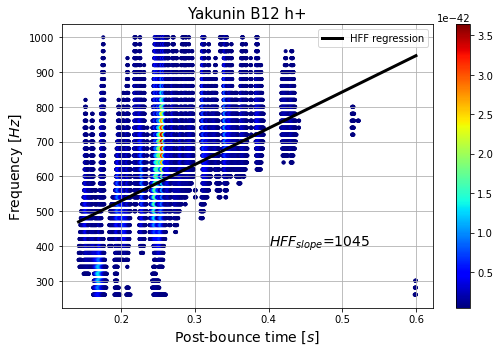

<Figure size 432x288 with 0 Axes>

In [23]:
# ------> Linear regression to estimate HFF slope

# Unique values of time
unique_t = np.unique(sorted_t)

# Initialize array for location of
# most energetic pixels per time
locate_maxpix = []

# Select most energetic pixels per time
for i in range(len(unique_t)):
    
    # Find location indexes for unique_t(i) in sorted_t array
    time_loc_ind = np.where(sorted_t == unique_t[i])[0]

    # Select most energetic pixel at time unique_t(i)
    W_max = 0
    for j in range(len(time_loc_ind)):
        
        if sorted_W[time_loc_ind[j]] > W_max:
            W_max = sorted_W[time_loc_ind[j]]
            ind_max_onetime = time_loc_ind[j]
    
    locate_maxpix.append(ind_max_onetime)

# Location (time,freq) of most energetic pixels
t_lr = np.take(sorted_t, locate_maxpix)
f_lr = np.take(sorted_f, locate_maxpix)

# Apply linear regression
res = stats.linregress(t_lr, f_lr)

# Print results
print("Linear regression for most energetic pixels")
print("---------------------------------------------")
print("R-squared:", res.rvalue**2)
print("Intercept:", res.intercept)
print("Slope:", res.slope)
print("---------------------------------------------")
print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(1, figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
plt.plot(t_lr, res.intercept + res.slope*t_lr, 'k-', linewidth=3, label='HFF regression')
plt.text(0.4, 400,'$HFF_{slope}$='+str(round(res.slope)), fontsize=14)

plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Yakunin B12 h+', fontsize=15)
plt.legend()

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()

plt.savefig("../Figures/" + "Yakunin_HFFslope.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

plt.show()

### 5.4. Mezzacappa model C15-3D

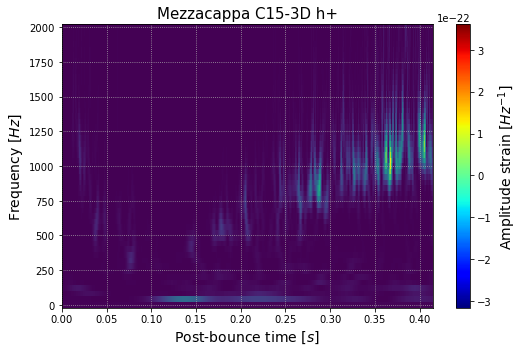

<Figure size 432x288 with 0 Axes>

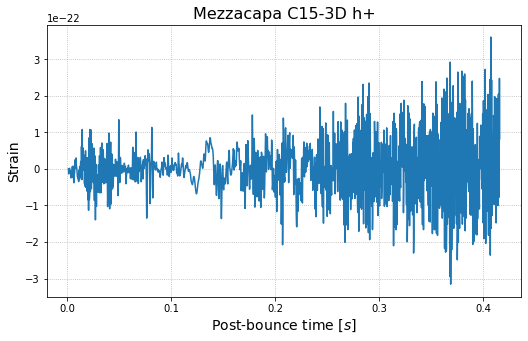

3233

<Figure size 432x288 with 0 Axes>

In [24]:
# ------> Compute wavelet transform

time, freq, WL = WaveletTF_transform(s_mezz_hp, fs_after, 1, 2000, 40, 7, 0)

# ------> Plot original scalogram

plt.figure(1, figsize=(7.5,5))

plt.pcolormesh(time, freq, WL, shading='auto')
norm = colors.Normalize(s_mezz_hp.min(), s_mezz_hp.max())
#norm = colors.Normalize(WL.min(), WL.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
plt.colorbar(mappable).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Frequency [$Hz$]', fontsize=14)
plt.title('Mezzacappa C15-3D h+', fontsize=15)

plt.grid(which='both', linestyle=':')
plt.tight_layout()

plt.savefig("../Figures/" + "Mezzacappa_scalogram.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

# Printable plot strain

plt.figure(2, figsize=(8.5,5))

plt.plot(t_mezz, s_mezz_hp)
plt.title("Mezzacapa C15-3D h+", fontsize=16)
plt.xlabel('Post-bounce time [$s$]', fontsize=14)
plt.ylabel('Strain', fontsize=14)
plt.grid(which='both', linestyle=':')

plt.savefig("../Figures/" + "Mezzacappa_strain.pdf", format="pdf")

plt.show()
plt.figure(2).clear()
gc.collect()

Wavelet Matrix dim: (51, 1699)
Time array dim: (1699,)
Frequency array dim: (51,)

Delta t =  0.000244140625
Delta f =  39.98

Aritmetic mean of WL pixels: 1.1717024861292908e-44

Sorted t array length: 12597
Sorted f array length: 12597
Sorted W array length: 12597



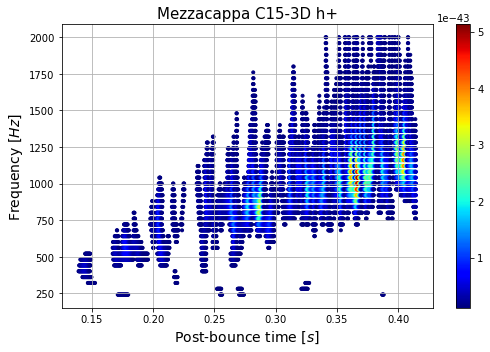

In [25]:
# ------> Plot pixelized (scattered) scalogram

# Check dimensions
print("Wavelet Matrix dim:", WL.shape)
print("Time array dim:", time.shape)
print("Frequency array dim:", np.transpose(freq)[0].shape)

print("")

# Sampling time / frequency
delta_t = time[1] - time[0]
delta_f = freq[1][0] - freq[0][0]
print("Delta t = ", delta_t)
print("Delta f = ", delta_f)

print("")

# Mean of WL pixels
WL_mean = np.mean(WL)
print("Aritmetic mean of WL pixels:", WL_mean)

# Reorganize arrays for time, freq, and wavelet

sorted_t = []
sorted_f = []
sorted_W = []

# Remark: WL[freq_index][time_index] (elements)
#         freq_index for row, time_index is for column

for freq_index in range(WL.shape[0]):    
    for time_index in range(WL.shape[1]):
        
        # Selection 1: Most energetic pixels,
        #              WL > mean(WL)
        if WL[freq_index][time_index] > WL_mean:
            
            # Selection 2: Pixels non in convection feature
            #              t > 0.1 seconds
            if time_index*delta_t > 0.1:
            
            # Selection 3: Pixels non in SASI feature,
            #              f > 250 Hz
                if (freq_index+1)*delta_f > 250:
                
                    sorted_t.append(time[time_index])
                    sorted_f.append(freq[freq_index])
                    sorted_W.append(WL[freq_index][time_index])

print("")
            
# Check dimensions
print("Sorted t array length:", len(sorted_t))
print("Sorted f array length:", len(sorted_f))
print("Sorted W array length:", len(sorted_W))

print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
    
plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Mezzacappa C15-3D h+', fontsize=15)

plt.colorbar(sc)
plt.grid(True)
plt.tight_layout()
plt.show()

Linear regression for most energetic pixels
---------------------------------------------
R-squared: 0.7550352025708744
Intercept: 53.39025639683791
Slope: 2806.3268849520664
---------------------------------------------



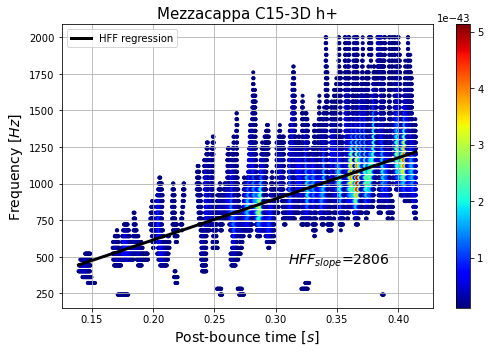

<Figure size 432x288 with 0 Axes>

In [26]:
# ------> Linear regression to estimate HFF slope

# Unique values of time
unique_t = np.unique(sorted_t)

# Initialize array for location of
# most energetic pixels per time
locate_maxpix = []

# Select most energetic pixels per time
for i in range(len(unique_t)):
    
    # Find location indexes for unique_t(i) in sorted_t array
    time_loc_ind = np.where(sorted_t == unique_t[i])[0]

    # Select most energetic pixel at time unique_t(i)
    W_max = 0
    for j in range(len(time_loc_ind)):
        
        if sorted_W[time_loc_ind[j]] > W_max:
            W_max = sorted_W[time_loc_ind[j]]
            ind_max_onetime = time_loc_ind[j]
    
    locate_maxpix.append(ind_max_onetime)

# Location (time,freq) of most energetic pixels
t_lr = np.take(sorted_t, locate_maxpix)
f_lr = np.take(sorted_f, locate_maxpix)

# Apply linear regression
res = stats.linregress(t_lr, f_lr)

# Print results
print("Linear regression for most energetic pixels")
print("---------------------------------------------")
print("R-squared:", res.rvalue**2)
print("Intercept:", res.intercept)
print("Slope:", res.slope)
print("---------------------------------------------")
print("")

# Plot scattered scalogram for most energetic pixels

fig = plt.figure(1, figsize=(7.5,5))
sc = plt.scatter(sorted_t, sorted_f, c=sorted_W, marker='.', cmap=plt.cm.jet)
plt.plot(t_lr, res.intercept + res.slope*t_lr, 'k-', linewidth=3, label='HFF regression')
plt.text(0.31, 450,'$HFF_{slope}$='+str(round(res.slope)), fontsize=14)
    
plt.xlabel("Post-bounce time [$s$]", fontsize=14)
plt.ylabel("Frequency [$Hz$]", fontsize=14)
plt.title('Mezzacappa C15-3D h+', fontsize=15)
plt.legend()

plt.colorbar(sc)
plt.grid(True)

plt.tight_layout()
plt.savefig("../Figures/" + "Mezzacappa_HFFslope.pdf", format="pdf")

plt.show()
plt.figure(1).clear()
gc.collect()

plt.show()